In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

In [12]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)
one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

In [13]:
feature_set

array([[ 0.49671415, -3.1382643 ],
       [ 0.64768854, -1.47697014],
       [-0.23415337, -3.23413696],
       ...,
       [-5.38692987,  2.50412183],
       [-1.90269981,  1.43435197],
       [-6.00763234,  3.57117941]])

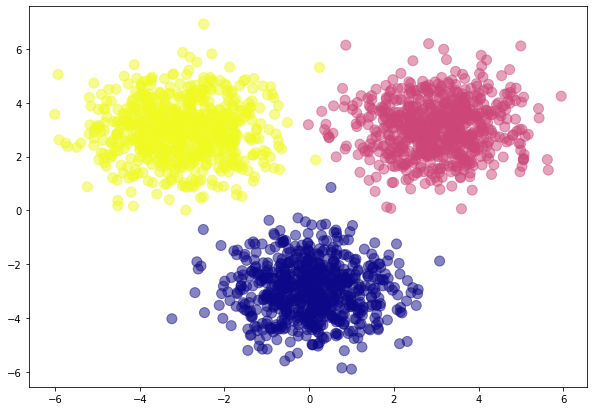

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [15]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()

nums = np.array([4, 5, 6])
print(softmax(nums))

[0.09003057 0.24472847 0.66524096]


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)

Loss function value:  3101.277959261377
Loss function value:  20.518567596960878
Loss function value:  13.41539643356695
Loss function value:  10.806239114192763
Loss function value:  9.293853043370646
Loss function value:  8.222335562342458
Loss function value:  7.427291388788854
Loss function value:  6.815957335510985
Loss function value:  6.3288007427772985
Loss function value:  5.9298003420658185
Loss function value:  5.595779425599992
Loss function value:  5.311118805512471
Loss function value:  5.064894173306703
Loss function value:  4.849225960985246
Loss function value:  4.658281872646843
Loss function value:  4.487648995564465
Loss function value:  4.333924545010692
Loss function value:  4.1944409886297365
Loss function value:  4.067076566158793
Loss function value:  3.950121680373943
Loss function value:  3.84218278881702
Loss function value:  3.742112039758679
Loss function value:  3.6489549384881403
Loss function value:  3.561910868828658
Loss function value:  3.48030292829

Loss function value:  0.676571071415612
Loss function value:  0.672846669817214
Loss function value:  0.6691566029784595
Loss function value:  0.6655004408652809
Loss function value:  0.6618777601441346
Loss function value:  0.6582881440564659
Loss function value:  0.6547311822959556
Loss function value:  0.6512064708885412
Loss function value:  0.6477136120750694
Loss function value:  0.6442522141965419
Loss function value:  0.6408218915819205
Loss function value:  0.6374222644383682
Loss function value:  0.6340529587438415
Loss function value:  0.6307136061421299
Loss function value:  0.6274038438400553
Loss function value:  0.6241233145069196
Loss function value:  0.6208716661761524
Loss function value:  0.6176485521490059
Loss function value:  0.6144536309003226
Loss function value:  0.6112865659862848
Loss function value:  0.6081470259541546
Loss function value:  0.6050346842538711
Loss function value:  0.6019492191514678
Loss function value:  0.5988903136443754
Loss function valu

In [17]:
def predmap(x,y):
    
    # Phase 1
    zh = np.dot([[x,y]], wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    
    maxi = max(ao[0])
    
    if maxi == ao[0][0]:
        color = 'blue'
    elif maxi == ao[0][1]:
        color = 'green'
    elif maxi == ao[0][2]:
        color = 'yellow'
    
    return color

In [18]:
predmap(0.49671415, -3.1382643)

'blue'

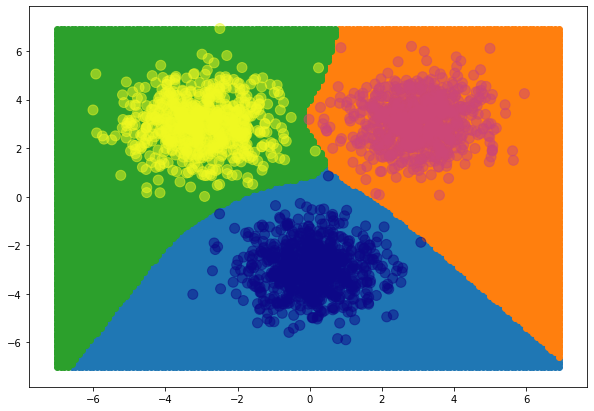

In [20]:
blue = []
green = []
yellow = []
for i in np.arange(-7, 7, 0.1):
    for j in np.arange(-7, 7, 0.1):
        color = predmap(i,j)
        
        if color == 'green':
            green.append([i, j])
        elif color == 'blue':
            blue.append([i, j])
        elif color == 'yellow':
            yellow.append([i, j])
        
blue = np.array(blue)
green = np.array(green)
yellow = np.array(yellow)

plt.figure(figsize=(10,7))
plt.scatter(list(blue[:,0]), list(blue[:,1]))
plt.scatter(list(green[:,0]), list(green[:,1]))
plt.scatter(list(yellow[:,0]), list(yellow[:,1]))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)